**PFG JAVIER ARTEAGA**

Este Proyecto Fin de Grado tiene como objetivo emplear técnicas de Machine Learning con el fin de conseguir una clasificación de los datos.

Se verán distintos algoritmos de clasificación clásica centrándose en el algoritmo Support Vector Machine (SVM), LogisticRegression (LR) y AdaBoost y comparando como se desempeñan en este caso.

La clasificación en este proyecto no va a ser únicamente clásica, se introducirán conceptos cuánticos con el fin de implementar un algoritmo de clasificación de QSVM, Quantum Support Vector Machine y Neuronal Network (cuántico).

Se verá en profundidad cómo funciona estos algoritmos y por último se veran cuales de los algoritmos, clásico o cuántico son capaces de alcanzar la precisión del modelo.

Esto se va aplicar a un caso de uso en relación con los accidentes de tráfico, en concreto se pordrá ver si en un accidente va a ver víctimas mortales o no, esto de categoriza en la variable 'muertos', la cual es nuestra variable objetivo

#LIBRERIAS

Se cargan todas las librerias usadas durante el proyecto

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras import models
from keras import layers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
%matplotlib inline

#PREPROCESAMIENTO

##Cargar BBDD

Se carga la base de datos de accidentes de tráfico de California

In [3]:
data = pd.read_csv('tablafinal.csv', sep=';',encoding='latin-1')
data.head()

,ID,zona,county_road_area,interstate,stateroute,autopista,notchp,num,calle,mal_tiempo,...,insurance,cellphone,marca,piel_clara,asiatico,hispano,conductor_victima,pasajero_victima,victimas_heridas,muertos
0,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,dodge,0.0,0.0,0.0,1.0,0.0,0,0
1,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,dodge,0.0,0.0,0.0,1.0,0.0,0,0
2,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,nissan,0.0,0.0,1.0,1.0,0.0,0,0
3,3858022,fresno,0,0,0,0,1,1STST,EASTCLINTON,0.0,...,1.0,NaN,nissan,0.0,0.0,1.0,1.0,0.0,0,0
4,3899450,losangeles,0,1,0,0,0,RT710,CARSONST,0.0,...,1.0,0.0,toyota,0.0,0.0,0.0,1.0,0.0,1,0


Consta de un conjunto de datos de 10k datos

- Training -> accidentes: con diversa información sobre los accidentes y su ocurrencia

- Output -> muertos: Muestra los clientes que no han sobrevivido al accidente.

## Reconocimiento de variables

Se muestrean todas las columnas para verlas mejor visualmente



In [4]:
data.columns

Index(['ID', 'zona', 'county_road_area', 'interstate', 'stateroute',
       'autopista', 'notchp', 'num', 'calle', 'mal_tiempo', 'buen_tiempo',
       'alta_vel', 'mal_giro/dir', 'alcohol', 'mal_cmbio_linea',
       'peaton_incumplimiento', 'por_señales', 'otra_causa', 'floor_dry',
       'floor_wet', 'tow_away', 'pedestrian_collision', 'bicycle_collision',
       'truck_collision', 'motorcycle_collision',
       'complaint_of_pain_injury_count', 'collision_time', 'collision_date',
       'party_count', 'male', 'victim_age', 'air_bag', 'car_belt', 'insurance',
       'cellphone', 'marca', 'piel_clara', 'asiatico', 'hispano',
       'conductor_victima', 'pasajero_victima', 'victimas_heridas', 'muertos'],
      dtype='object')

Se muestra la forma de este dataset

In [5]:
data.shape

(10000, 43)

## Datos faltantes

Se observa si hay NA en los datos

In [6]:
data.isna().sum()

ID                                   0
zona                                 0
county_road_area                     0
interstate                           0
stateroute                           0
autopista                            0
notchp                               0
num                                  0
calle                                0
mal_tiempo                          37
buen_tiempo                         37
alta_vel                           399
mal_giro/dir                       399
alcohol                            399
mal_cmbio_linea                    399
peaton_incumplimiento              399
por_señales                        399
otra_causa                         399
floor_dry                           49
floor_wet                           49
tow_away                             0
pedestrian_collision                 1
bicycle_collision                    1
truck_collision                      1
motorcycle_collision                 1
complaint_of_pain_injury_

Se pasan las variables categóricas a numéricas para mejor trato de los datos

In [7]:
# Asegúrate de que las horas estén en formato datetime
data['collision_time'] = pd.to_datetime(data['collision_time'], format='%H:%M:%S')
data['Dia'] = data['collision_time'].apply(lambda x: '1' if 6 <= x.hour < 18 else '0').astype(int)

data['collision_date'] = pd.to_datetime(data['collision_date'], format='%d/%m/%Y')
data['verano'] = data['collision_date'].dt.month.isin([6, 7, 8]).astype(int)

Se muestrean los formatos de las columnas

In [8]:
print(data.dtypes)

ID                                         int64
zona                                      object
county_road_area                           int64
interstate                                 int64
stateroute                                 int64
autopista                                  int64
notchp                                     int64
num                                       object
calle                                     object
mal_tiempo                               float64
buen_tiempo                              float64
alta_vel                                 float64
mal_giro/dir                             float64
alcohol                                  float64
mal_cmbio_linea                          float64
peaton_incumplimiento                    float64
por_señales                              float64
otra_causa                               float64
floor_dry                                float64
floor_wet                                float64
tow_away            

Se eliminan ciertas variables no númericas

In [9]:
data = data.drop(['collision_time','zona','num','calle','marca','collision_date','ID'], axis=1)

Se cuenta la cantidad de ocurrencias de cada valor único en la columna objetivo

In [10]:
valores_muertos = data['muertos'].value_counts()
print(valores_muertos)

muertos
0    9575
1     425
Name: count, dtype: int64


## VARIABLES SELECCIONADAS

Se agrupa los datos del DataFrame data por los valores únicos en la columna 'muertos' y se calcula la varianza de cada grupo resultante para todas las columnas numéricas en el DataFrame.

In [11]:
varianza_por_muertos = data.groupby('muertos').var()

varianza_por_muertos

,county_road_area,interstate,stateroute,autopista,notchp,mal_tiempo,buen_tiempo,alta_vel,mal_giro/dir,alcohol,...,insurance,cellphone,piel_clara,asiatico,hispano,conductor_victima,pasajero_victima,victimas_heridas,Dia,verano
muertos,,,,,,,,,,,,,,,,,,,,,
0,0.103540,0.151292,0.117653,0.043371,0.249826,0.084821,0.084821,0.235307,0.223049,0.096523,...,0.065117,0.014732,0.241653,0.057025,0.237099,0.049380,0.022661,6.201984,0.186115,0.112512
1,0.192286,0.094895,0.161787,0.049201,0.236437,0.094209,0.094209,0.166930,0.238377,0.204904,...,0.141519,0.013367,0.249398,0.031523,0.239574,0.105849,0.093030,1.624895,0.248890,0.004695


La varianza de las columnas 'mal_tiempo', 'buen_tiempo', 'muertos' para la categoría 'muertos' igual a 1 es mayor que para la categoría 'muertos' igual a 0. Esto indica que estas variables tienen una variabilidad más alta entre los casos donde hay muertos en comparación con los casos donde no los hay.

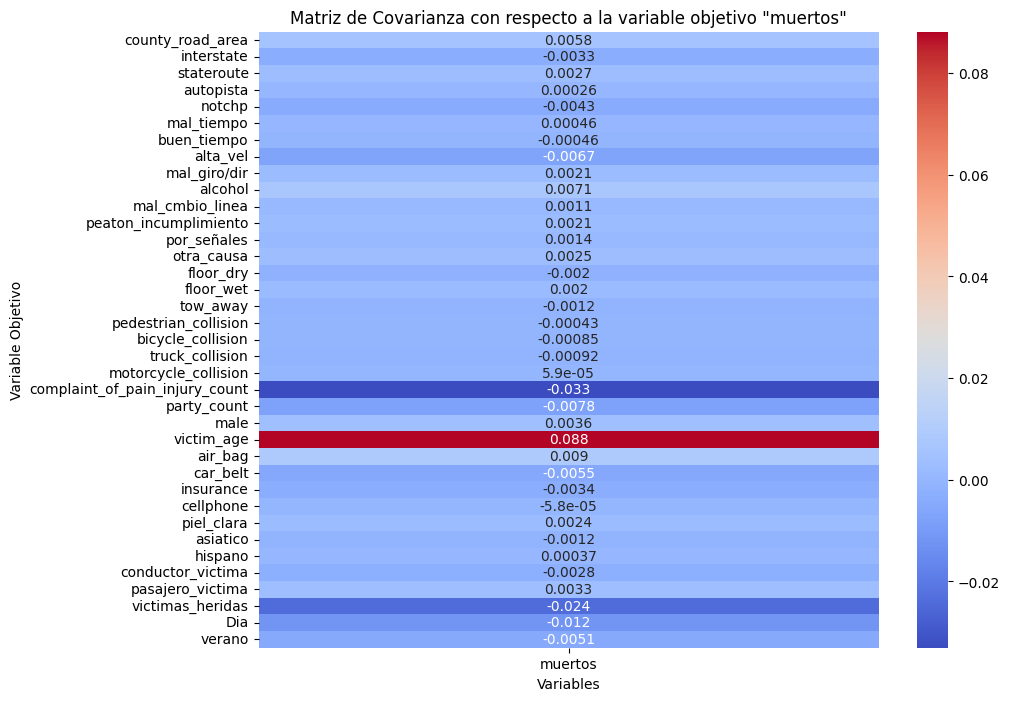

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de covarianza entre todas las columnas
covarianza_total = data.cov()

# Filtra la covarianza solo para la variable objetivo 'muertos'
covarianza_con_muertos = covarianza_total['muertos']

# Elimina la covarianza de 'muertos' consigo mismo
covarianza_con_muertos = covarianza_con_muertos.drop('muertos')

# Crea un mapa de calor de la covarianza
plt.figure(figsize=(10,8))
sns.heatmap(covarianza_con_muertos.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Matriz de Covarianza con respecto a la variable objetivo "muertos"')
plt.xlabel('Variables')
plt.ylabel('Variable Objetivo')
plt.show()


LA COVARIANZA NO NOS APORTA MUCHO POR ESO SE PROCEDE A CALCULAR LA CORRELACIÓN

Se calcula la correlación de las distintas variables respecto con la variable objetivo

<ipython-input-13-ba45f2489522>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_con_muertos.values, y=correlacion_con_muertos.index, orient='h', palette='viridis')


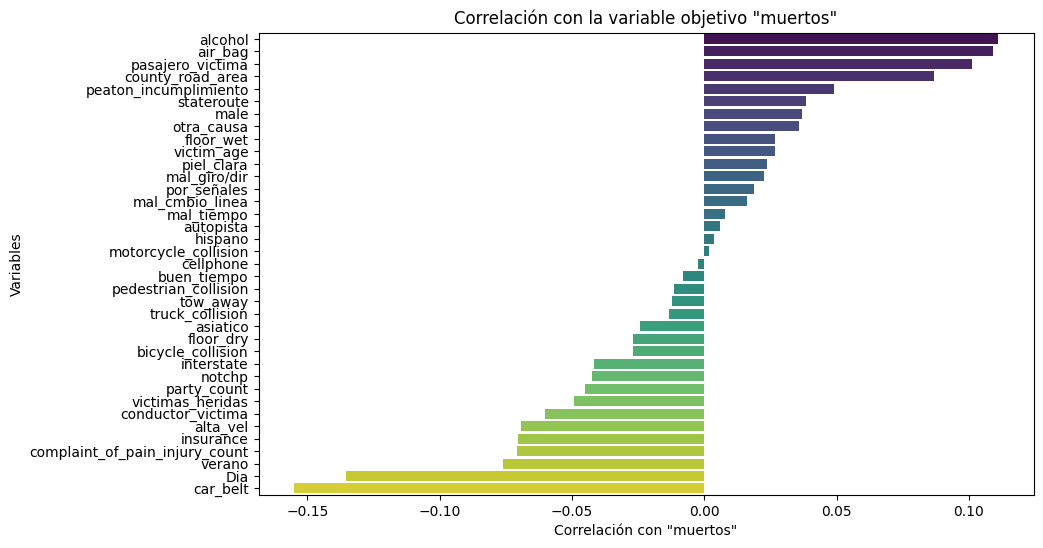

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de correlación entre todas las columnas
correlacion_total = data.corr()

# Filtra la correlación solo para la variable objetivo 'muertos'
correlacion_con_muertos = correlacion_total['muertos']

# Elimina la correlación de 'muertos' consigo mismo
correlacion_con_muertos = correlacion_con_muertos.drop('muertos')

# Ordena los valores de correlación de mayor a menor
correlacion_con_muertos = correlacion_con_muertos.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=correlacion_con_muertos.values, y=correlacion_con_muertos.index, orient='h', palette='viridis')
plt.xlabel('Correlación con "muertos"')
plt.ylabel('Variables')
plt.title('Correlación con la variable objetivo "muertos"')
plt.show()

Se escogen las 15 columnas que tienen mayor correlación con la variable objetivo (muertos)

A partir de ahora solo se usaran exclusivamente  16 variables ya que tratar con todas podría ser algo ineficiente computacionalmente.

In [14]:
# Ordena las correlaciones por valor absoluto en orden descendente
correlacion_absoluta = correlacion_con_muertos.abs().sort_values(ascending=False)

# Selecciona las 17 características con mayor correlación
caracteristicas_seleccionadas = correlacion_absoluta[1:16]  # Excluye la correlación con "muertos"

caracteristicas_seleccionadas

Dia                               0.135247
alcohol                           0.111094
air_bag                           0.108952
pasajero_victima                  0.101071
county_road_area                  0.086843
verano                            0.076220
complaint_of_pain_injury_count    0.070707
insurance                         0.070457
alta_vel                          0.069142
conductor_victima                 0.060354
victimas_heridas                  0.049161
peaton_incumplimiento             0.049084
party_count                       0.044985
notchp                            0.042260
interstate                        0.041745
Name: muertos, dtype: float64

AFECTAN POSITIVAMENTE: ALCOHOL, AIR BAG, PASAJERO_VICTIMAS

AFECTAN NEGATIVAMENTE: DIA, CINTURON

In [15]:
data = data[['notchp', 'county_road_area', 'alta_vel','alcohol',
             'peaton_incumplimiento', 'complaint_of_pain_injury_count',
             'Dia', 'verano', 'party_count','air_bag', 'car_belt', 'insurance',
            'conductor_victima', 'pasajero_victima', 'victimas_heridas', 'muertos']]

QUITAR LOS VALORES NULOS

In [16]:
data=data.dropna()

Se vuelve a muestrear la forma del dataset restante

In [17]:
data.shape

(7531, 16)

Se escogen 300 muestras de las cuales 150 representan que haya muertos y 150 reprentan que no ha habido muertos

In [18]:
Muertosno=data[data['muertos']==0].sample(n=150, random_state=1)
Muertossi=data[data['muertos']==1].sample(n=150, random_state=1)

data = pd.concat([Muertosno, Muertossi],axis=0)

Se comprueba que la dimension de nuestros datos es la correcta

In [19]:
data.shape

(300, 16)

## DIVISIÓN DATOS

Sacar la variable objetivo y dividir nuestros datos según
datos de entrenamiento y datos de test

In [20]:
X = data.drop('muertos', axis=1)
Y = data['muertos']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = MinMaxScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))


# Normalizar los datos de entrenamiento
x_train = scaler.fit_transform(x_train)

# Transformar los datos de prueba usando el mismo escalador
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape

((240, 15), (240,))

Datos de Test

In [21]:
x_test.shape, y_test.shape

((60, 15), (60,))

Comprobación de que hay el mismo numero de 1 y 0 en la columna objetivo, en este caso muertos

In [22]:
valores_muertos = data['muertos'].value_counts()
print(valores_muertos)

muertos
0    150
1    150
Name: count, dtype: int64


Se describen los datos

In [23]:
data.describe()

,notchp,county_road_area,alta_vel,alcohol,peaton_incumplimiento,complaint_of_pain_injury_count,Dia,verano,party_count,air_bag,car_belt,insurance,conductor_victima,pasajero_victima,victimas_heridas,muertos
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.000000,300.000000
mean,0.343333,0.240000,0.303333,0.200000,0.046667,0.643333,0.620000,0.053333,1.653333,0.326667,0.880000,0.890000,1.0,0.0,1.180000,0.500000
std,0.475615,0.427797,0.460466,0.400668,0.211276,1.741522,0.486197,0.225073,0.809531,0.469778,0.325504,0.313413,0.0,0.0,1.945993,0.500835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.0,1.000000,0.500000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.0,0.0,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.0,0.0,25.000000,1.000000


# MODELOS CLÁSICOS

### CLASIFICADOR CLÁSICO CON EPOCHS NEU NET BUENO

Se quita la variable objetivo

In [23]:
X = data.drop(['muertos'],axis=1).values
Y = data['muertos'].values

Se escalan los datos con StadardScaler aunque también se ha probado MinMaxScaler

In [24]:
#scaler = MinMaxScaler() entre 0 y pi
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
# Normalizar los datos de entrenamiento
x_train = scaler.fit_transform(x_train)

# Transformar los datos de prueba usando el mismo escalador
x_test = scaler.transform(x_test)

In [26]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,15)
        self.hidden_layer1  = nn.Linear(15,2)  #hemos bajado el número de capas
        self.hidden_layer2  = nn.Linear(2,15)  #hemos bajado el número de capas
        self.output_layer   = nn.Linear(15,output_dim)
        self.relu = nn.ReLU()
        #self.qnn=TorchConnector(qnn)
        self.hidden_layer3=nn.Linear(1,1)

    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        out =  self.output_layer(out)
        return out

In [28]:
input_dim  = 15  #nº columnas quitando la columna objetivo
output_dim = 2  #nº de las posibles salidas dentro de la columna objetivo

In [45]:
num_epochs = 200
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [30]:
def get_accuracy_multiclass(pred_arr, original_arr):
    pred_arr = pred_arr.detach().numpy()  # Usar detach() para obtener una copia del tensor sin gradiente
    original_arr = original_arr.detach().numpy()  # Usar detach() para obtener una copia del tensor sin gradiente

    final_pred = np.argmax(pred_arr, axis=1)
    count = np.sum(final_pred == original_arr)
    return count / len(final_pred)


In [48]:
import matplotlib.pyplot as plt

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output_train = model(X_train)
        loss_train = criterion(output_train, y_train)
        loss_train.backward()
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)

        # Calcular accuracy en cada época
        train_accuracy = get_accuracy_multiclass(output_train, y_train)
        test_accuracy = get_accuracy_multiclass(output_test, y_test)

        train_losses.append(loss_train.item())
        test_losses.append(loss_test.item())
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # if (epoch + 1) % 50 == 0:
        #     print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    return train_losses, test_losses, train_accuracies, test_accuracies

learning_rates = [0.1, 0.01, 0.02, 0.001]
accuracies_train = []
accuracies_test = []

criterion = nn.CrossEntropyLoss()


for learning_rate in learning_rates:
    model = NeuralNetworkClassificationModel(input_dim, output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, test_losses, train_accuracies, test_accuracies = train_network(model, optimizer, criterion, x_train, y_train, x_test, y_test, num_epochs)

    # Obtener la precisión final
    final_train_accuracy = train_accuracies[-1]
    final_test_accuracy = test_accuracies[-1]

    accuracies_train.append(final_train_accuracy)
    accuracies_test.append(final_test_accuracy)

    print(f"Learning Rate: {learning_rate}")
    print(f"Final Training Accuracy: {round(final_train_accuracy * 100, 3)}%")
    print(f"Final Test Accuracy: {round(final_test_accuracy * 100, 3)}%")

# Imprimir las precisiones finales para cada learning rate
print("Final Train Accuracies:", accuracies_train)
print("Final Test Accuracies:", accuracies_test)

# Entrenar y graficar para cada learning rate
for learning_rate in learning_rates:
    model = NeuralNetworkClassificationModel(input_dim, output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, test_losses, train_accuracies, test_accuracies = train_network(model, optimizer, criterion, x_train, y_train, x_test, y_test, num_epochs)

    # Graficar las pérdidas y accuracies
    # plt.figure(figsize=(12, 5))

    # plt.subplot(1, 2, 1)
    # plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    # plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Train and Test Losses for Learning Rate = {learning_rate}')
    # plt.legend()

    # plt.subplot(1, 2, 2)
    # plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    # plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.title(f'Train and Test Accuracies for Learning Rate = {learning_rate}')
    # plt.legend()

    # plt.tight_layout()
    # plt.show()


#LEARNING RATE DE 0.1
# 100 ÉPOCAS ES LA MEJOR CONFIGURACIÓN  (con 200 epocas va similar pero tarda más (0.9 y 0.86 en pruebas y 0.96 en train))

#Final Train Accuracies: 0.8375  // 0.82
#Final Test Accuracies: 0.81    //  0.80

# 200 ÉPOCAS ES LA MEJOR CONFIGURACIÓN YA QUE LUEGO EL SISTEMA NO MEJORA PARA LOS LEARNING RATES DE 0.01 Y 0.02

#Final Train Accuracies: [0.7833333333333333, 0.8166666666666667] con 200
#Final Test Accuracies: [0.8133333333333333, 0.8233333333333333] con 200

# 600-700 ÉPOCAS ES LA MEJOR CONFIGURACIÓN YA QUE LUEGO EL SISTEMA NO MEJORA PARA EL LEARNING RATE DE 0.001

#Final Train Accuracies: 0.78 con 600
#Final Test Accuracies: 0.83 con 600

#Final Train Accuracies: 0.8 con 700
#Final Test Accuracies: 0.85 con 700


Learning Rate: 0.1
Final Training Accuracy: 91.25%
Final Test Accuracy: 78.333%
Learning Rate: 0.01
Final Training Accuracy: 93.75%
Final Test Accuracy: 73.333%
Learning Rate: 0.02
Final Training Accuracy: 93.333%
Final Test Accuracy: 81.667%
Learning Rate: 0.001
Final Training Accuracy: 87.5%
Final Test Accuracy: 78.333%
Final Train Accuracies: [0.9125, 0.9375, 0.9333333333333333, 0.875]
Final Test Accuracies: [0.7833333333333333, 0.7333333333333333, 0.8166666666666667, 0.7833333333333333]


### CLASIFICADOR CLÁSICO

SE PRUEBAN DISTINTOS MODELOS CON DISTINTAS CONFIGURACIONES

Además se muestra la precisión de nuestros clasificadores clásicos con los datos de train

In [99]:
clf = LogisticRegression(C=1.0, penalty='l1', solver='liblinear', multi_class='auto')

clf2 = SVC(kernel='rbf', random_state=1, C=1, probability=True)

clf3 = SGDClassifier(loss='modified_huber') #loss='hinge' precisión 0.7, log_loss 0.66, perceptron 0.65,
#modified_huber 0.8 (a veces más bajo), epsilon_insensitive 0.55, squared_error 0.6, huber 0.38, squared_hinge 0.7
#'log_loss', 'modified_huber'

clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)

# Random Forest Classifier
clf5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Gradient Boosting Classifier
clf6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Ada Boost Classifier
clf7 = AdaBoostClassifier(n_estimators=100, random_state=42)

clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
clf5.fit(x_train, y_train)
clf6.fit(x_train, y_train)
clf7.fit(x_train, y_train)

# Predecir etiquetas usando los modelos entrenados en los datos de entrenamiento
predict_clf_clasico_train = clf.predict(x_train)
predict_clf_clasico2_train = clf2.predict(x_train)
predict_clf_clasico3_train = clf3.predict(x_train)
predict_clf_clasico4_train = clf4.predict(x_train)
predict_clf_clasico5_train = clf5.predict(x_train)
predict_clf_clasico6_train = clf6.predict(x_train)
predict_clf_clasico7_train = clf7.predict(x_train)

# Calcular la precisión en los datos de entrenamiento
accuracy_clc_clasico_train = accuracy_score(y_train, predict_clf_clasico_train)
accuracy_clc_clasico2_train = accuracy_score(y_train, predict_clf_clasico2_train)
accuracy_clc_clasico3_train = accuracy_score(y_train, predict_clf_clasico3_train)
accuracy_clc_clasico4_train = accuracy_score(y_train, predict_clf_clasico4_train)
accuracy_clc_clasico5_train = accuracy_score(y_train, predict_clf_clasico5_train)
accuracy_clc_clasico6_train = accuracy_score(y_train, predict_clf_clasico6_train)
accuracy_clc_clasico7_train = accuracy_score(y_train, predict_clf_clasico6_train)

# Imprimir la precisión en los datos de entrenamiento
print("LogisticRegression - Precisión:", accuracy_clc_clasico_train)
print("SVM - Precisión:", accuracy_clc_clasico2_train)
print("SGDClassifier - Precisión:", accuracy_clc_clasico3_train)
print("DecisionTreeClassifier - Precisión:", accuracy_clc_clasico4_train)
print("Random Forest Classifier - Precisión:", accuracy_clc_clasico5_train)
print("Gradient Boosting Classifier - Precisión:", accuracy_clc_clasico6_train)
print("Ada Boost Classifier - Precisión:", accuracy_clc_clasico7_train)

LogisticRegression - Precisión: 0.7958333333333333
SVM - Precisión: 0.8208333333333333
SGDClassifier - Precisión: 0.75
DecisionTreeClassifier - Precisión: 0.7875
Random Forest Classifier - Precisión: 0.8375
Gradient Boosting Classifier - Precisión: 0.8875
Ada Boost Classifier - Precisión: 0.8875


Se muestra la precisión de nuestros clasificadores clásicos con los datos de test

In [100]:
predict_clf_clasico=clf.predict(x_test)
predict_clf_clasico2=clf2.predict(x_test)
predict_clf_clasico3=clf3.predict(x_test)
predict_clf_clasico4 = clf4.predict(x_test)
predict_clf_clasico5 = clf5.predict(x_test)
predict_clf_clasico6 = clf6.predict(x_test)
predict_clf_clasico7 = clf7.predict(x_test)

accuracy_clc_clasico = accuracy_score(y_test, predict_clf_clasico)
accuracy_clc_clasico2 = accuracy_score(y_test, predict_clf_clasico2)
accuracy_clc_clasico3 = accuracy_score(y_test, predict_clf_clasico3)
accuracy_clc_clasico4 = accuracy_score(y_test, predict_clf_clasico4)
accuracy_clc_clasico5 = accuracy_score(y_test, predict_clf_clasico5)
accuracy_clc_clasico6 = accuracy_score(y_test, predict_clf_clasico6)
accuracy_clc_clasico7 = accuracy_score(y_test, predict_clf_clasico7)

print("LogisticRegression - Precisión", accuracy_clc_clasico)
print("SVM - Precisión", accuracy_clc_clasico2)
print("SGDClassifier - Precisión:", accuracy_clc_clasico3)
print("DecisionTreeClassifier - Precisión:", accuracy_clc_clasico4)
print("Random Forest Classifier - Precisión:", accuracy_clc_clasico5)
print("Gradient Boosting Classifier - Precisión:", accuracy_clc_clasico6)
print("Ada Boost Classifier - Precisión:", accuracy_clc_clasico7)

LogisticRegression - Precisión 0.75
SVM - Precisión 0.7333333333333333
SGDClassifier - Precisión: 0.6666666666666666
DecisionTreeClassifier - Precisión: 0.6833333333333333
Random Forest Classifier - Precisión: 0.75
Gradient Boosting Classifier - Precisión: 0.7333333333333333
Ada Boost Classifier - Precisión: 0.7333333333333333


MATRICES DE CONFUSIÓN

In [101]:
confusion = confusion_matrix(y_test, predict_clf_clasico)
confusion2 = confusion_matrix(y_test, predict_clf_clasico2)
confusion3 = confusion_matrix(y_test, predict_clf_clasico3)
confusion4 = confusion_matrix(y_test, predict_clf_clasico4)
confusion5 = confusion_matrix(y_test, predict_clf_clasico5)
confusion6 = confusion_matrix(y_test, predict_clf_clasico6)
confusion7 = confusion_matrix(y_test, predict_clf_clasico7)

confusion, confusion2, confusion3, confusion4, confusion5, confusion6, confusion7

(array([[25,  7],
        [ 8, 20]]),
 array([[28,  4],
        [12, 16]]),
 array([[29,  3],
        [17, 11]]),
 array([[24,  8],
        [11, 17]]),
 array([[24,  8],
        [ 7, 21]]),
 array([[22, 10],
        [ 6, 22]]),
 array([[21, 11],
        [ 5, 23]]))

### CC LogisticRegression MEJORADO


El modelo clásico que peor ha funcionado ha sido LogisticRegression, ver si se puede mejorar la precisión de esta cogiendo 'los mejores' parámetros

In [26]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, Y)

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Obtener las características
features = X.columns

# Crear un diccionario para almacenar la importancia de las características
importances = {}

# Asignar los coeficientes a las características correspondientes
for feature, coef in zip(features, coefficients):
    importances[feature] = abs(coef)

# Ordenar las características por importancia
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Imprimir las características ordenadas por importancia
for feature, importance in importances_sorted:
    print(f"{feature}: {importance}")


verano: 1.8925895999402018
insurance: 1.43465362811877
car_belt: 1.2708669060782385
air_bag: 1.1477088055645623
county_road_area: 1.0866025811262816
complaint_of_pain_injury_count: 1.077196012220126
Dia: 0.9887374941062445
peaton_incumplimiento: 0.3768040596446124
party_count: 0.3437169202434649
victimas_heridas: 0.3357930599192848
alcohol: 0.2700965291624498
notchp: 0.2219538485781571
alta_vel: 0.19666955087079588
conductor_victima: 0.00015352860057121895
pasajero_victima: 0.0


Seleccionar las 15 características con las importancias más altas

In [27]:
top_15_feature_names = [feature for feature, _ in importances_sorted[:15]]

train_data_final_q1 = data[top_15_feature_names]
train_data_final_q1 = data.sample(n=300, random_state=42)

In [28]:
X_q1 = train_data_final_q1.drop('muertos', axis=1)
Y_q1 = train_data_final_q1['muertos']

In [29]:
X_train_q1, X_test_q1, Y_train_q1, Y_test_q1 = train_test_split(X_q1, Y_q1, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir el modelo base
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2']  # Tipo de penalización
}

# Configurar GridSearchCV
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search_lr.fit(X_q1, Y_q1)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search_lr.best_params_)

# Mejor score encontrado
print("Mejor score de precisión:", grid_search_lr.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model_lr = grid_search_lr.best_estimator_

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_lr = cross_val_score(best_model_lr, X_q1, Y_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo: {np.mean(scores_lr)}')


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'C': 100, 'penalty': 'l2'}
Mejor score de precisión: 0.7933333333333333
Precisión promedio con el mejor modelo: 0.7933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Se puede observar como escogiendo los mejores hiperparámetros el modelo aumenta un 2% (mejora notable), aunque sigue siendo baja respecta a otros modelos clásicos

### CC SVM MEJORADO

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define los parámetros que deseas optimizar
parametros = {'C': [0.1, 1, 1.5, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 1.5, 2], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Inicializa el clasificador SVM con probability=True
svm = SVC(probability=True)

# Inicializa la búsqueda de cuadrícula
grid_search = GridSearchCV(svm, parametros, cv=5)

# Realiza la búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_q1, Y_q1)

# Muestra los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Utiliza los mejores parámetros para el SVM
svm_optimo = SVC(**grid_search.best_params_, probability=True)

# Entrena el modelo SVM con los mejores parámetros encontrados
svm_optimo.fit(X_q1, Y_q1)

# Obtener las predicciones en el conjunto de prueba
predicciones = svm_optimo.predict(X_test_q1)

# Calcular y mostrar la precisión del modelo con los mejores parámetros
precision = accuracy_score(Y_test_q1, predicciones)
print("Precisión del mejor modelo SVM:", precision)

# Realizar validación cruzada con el modelo final para confirmar los resultados
scores_sv = cross_val_score(svm_optimo, X_q1, Y_q1, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo SVM: {np.mean(scores_sv)}')

Mejores parámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Precisión del mejor modelo SVM: 0.9
Precisión promedio con el mejor modelo SVM: 0.7733333333333332


### CURVA ROC DISTINTOS MODELOS CLÁSICOS

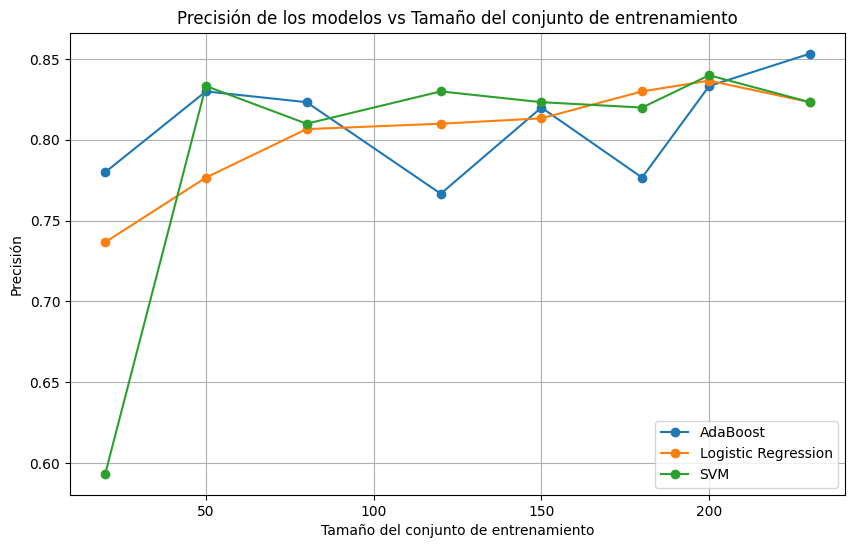

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Crear un conjunto de datos de ejemplo (reemplazar con tu propio conjunto de datos)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_q1, X_test_q1, Y_q1, Y_test_q1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Tamaños de entrenamiento
train_sizes = [20, 50, 80, 120, 150, 180, 200, 230]

# Listas para almacenar las precisiones
accuracies_ada = []
accuracies_lr = []
accuracies_svm = []

# Mejores hiperparámetros previamente encontrados
best_params_lr = {'C': 10, 'penalty': 'l2', 'max_iter': 1000, 'random_state': 42}
best_params_svm = {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True, 'random_state': 42}

for size in train_sizes:
    # Subconjunto de entrenamiento
    idx = np.random.choice(range(len(X_q1)), size, replace=False)
    X_subset, Y_subset = X_q1[idx], Y_q1[idx]

    # Entrenar AdaBoost
    clf_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
    clf_ada.fit(X_subset, Y_subset)
    Y_pred_ada = clf_ada.predict(X_test_q1)
    accuracies_ada.append(accuracy_score(Y_test_q1, Y_pred_ada))

    # Entrenar Logistic Regression con mejores hiperparámetros
    clf_lr = LogisticRegression(**best_params_lr)
    clf_lr.fit(X_subset, Y_subset)
    Y_pred_lr = clf_lr.predict(X_test_q1)
    accuracies_lr.append(accuracy_score(Y_test_q1, Y_pred_lr))

    # Entrenar SVM con mejores hiperparámetros
    clf_svm = SVC(**best_params_svm)
    clf_svm.fit(X_subset, Y_subset)
    Y_pred_svm = clf_svm.predict(X_test_q1)
    accuracies_svm.append(accuracy_score(Y_test_q1, Y_pred_svm))

# Plotear las precisiones
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies_ada, label='AdaBoost', marker='o')
plt.plot(train_sizes, accuracies_lr, label='Logistic Regression', marker='o')
plt.plot(train_sizes, accuracies_svm, label='SVM', marker='o')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Precisión de los modelos vs Tamaño del conjunto de entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


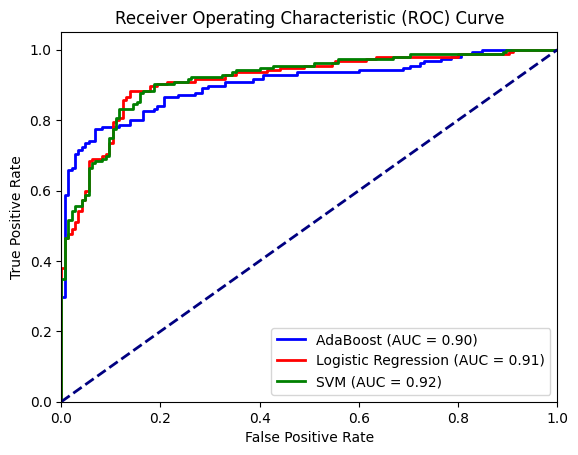

Precisión del modelo AdaBoost: 0.82
Precisión del mejor modelo Logistic Regression: 0.8466666666666667
Precisión del mejor modelo SVM: 0.8466666666666667


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Crear un conjunto de datos de ejemplo (reemplazar con tu propio conjunto de datos)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_q1, X_test_q1, Y_q1, Y_test_q1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: AdaBoostClassifier
clf7 = AdaBoostClassifier(n_estimators=100, random_state=42)
clf7.fit(X_q1, Y_q1)
probas_ada = clf7.predict_proba(X_test_q1)[:, 1]

# Modelo 2: Logistic Regression con mejores hiperparámetros
best_model_lr = LogisticRegression(C=10, penalty='l2', max_iter=1000, random_state=42)  # Reemplaza con tus mejores hiperparámetros
best_model_lr.fit(X_q1, Y_q1)
probas_lr = best_model_lr.predict_proba(X_test_q1)[:, 1]

# Modelo 3: SVC con mejores hiperparámetros
svm_optimo = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, random_state=42)  # Reemplaza con tus mejores hiperparámetros
svm_optimo.fit(X_q1, Y_q1)
probas_svm = svm_optimo.predict_proba(X_test_q1)[:, 1]

# Calcular las curvas ROC y AUC
fpr_ada, tpr_ada, _ = roc_curve(Y_test_q1, probas_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_lr, tpr_lr, _ = roc_curve(Y_test_q1, probas_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(Y_test_q1, probas_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotear las curvas
plt.figure()
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Imprimir las precisiones de los modelos
precision_ada = clf7.score(X_test_q1, Y_test_q1)
precision_lr = best_model_lr.score(X_test_q1, Y_test_q1)
precision_svm = svm_optimo.score(X_test_q1, Y_test_q1)

print(f"Precisión del modelo AdaBoost: {precision_ada}")
print(f"Precisión del mejor modelo Logistic Regression: {precision_lr}")
print(f"Precisión del mejor modelo SVM: {precision_svm}")

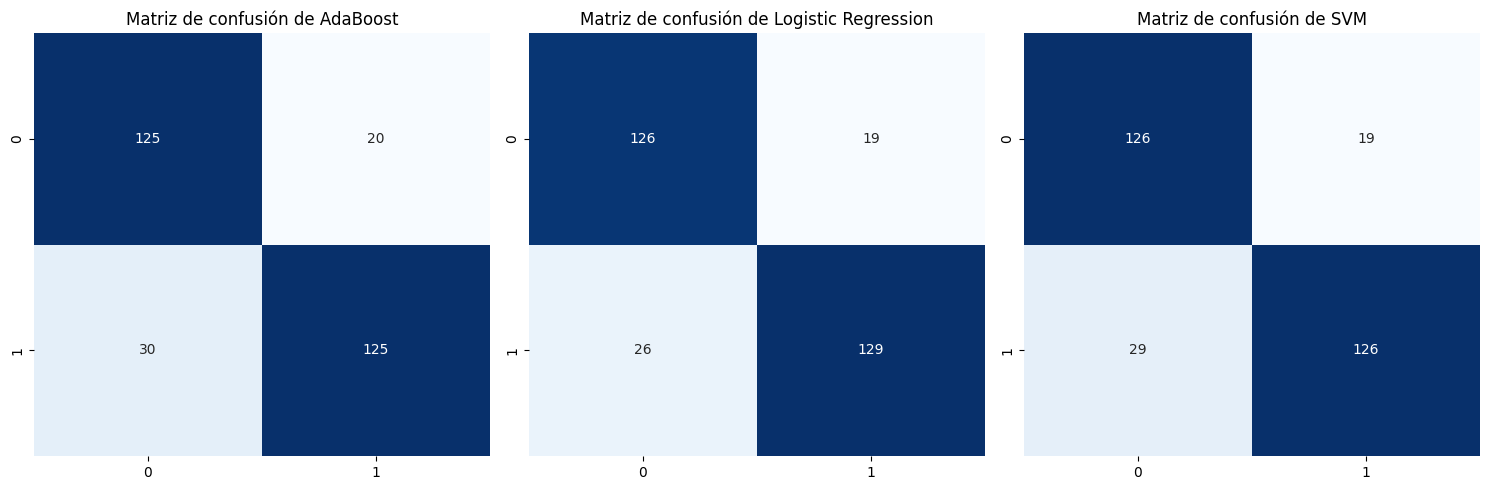

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Crear un conjunto de datos de ejemplo (reemplazar con tu propio conjunto de datos)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_q1, X_test_q1, Y_q1, Y_test_q1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Tamaño del conjunto de entrenamiento
size = 300

# Subconjunto de entrenamiento
idx = np.random.choice(range(len(X_q1)), size, replace=False)
X_subset, Y_subset = X_q1[idx], Y_q1[idx]

# Mejores hiperparámetros previamente encontrados
best_params_lr = {'C': 10, 'penalty': 'l2', 'max_iter': 1000, 'random_state': 42}
best_params_svm = {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True, 'random_state': 42}

# Entrenar AdaBoost
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_ada.fit(X_subset, Y_subset)
Y_pred_ada = clf_ada.predict(X_test_q1)

# Entrenar Logistic Regression con mejores hiperparámetros
clf_lr = LogisticRegression(**best_params_lr)
clf_lr.fit(X_subset, Y_subset)
Y_pred_lr = clf_lr.predict(X_test_q1)

# Entrenar SVM con mejores hiperparámetros
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_subset, Y_subset)
Y_pred_svm = clf_svm.predict(X_test_q1)

# Obtener matrices de confusión de los modelos
conf_matrix_ada = confusion_matrix(Y_test_q1, Y_pred_ada)
conf_matrix_lr = confusion_matrix(Y_test_q1, Y_pred_lr)
conf_matrix_svm = confusion_matrix(Y_test_q1, Y_pred_svm)

# Plotear matrices de confusión usando Seaborn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de AdaBoost')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de Logistic Regression')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión de SVM')

plt.tight_layout()
plt.show()


# MODELO CUÁNTICO

### QSVM

In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512614 sha256=da0f5420ac919ada14784894fdc5a0f50cd8d5a02aef246a3189ce0ee9cf862d
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448da

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = ZZFeatureMap(feature_dimension=15, reps=1, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
# Crear un modelo SVM con el kernel cuántico
svm = SVC(kernel=kernel.evaluate)
svm.fit(x_train,y_train)

SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7d26dc372b60>>)

In [ ]:
predict_clf_cuantico=svm.predict(x_test)
accuracy_clc_cuantico=accuracy_score(y_test, predict_clf_cuantico)
print(f'Accuracy: {accuracy_clc_cuantico}')

Accuracy: 0.7333333333333333


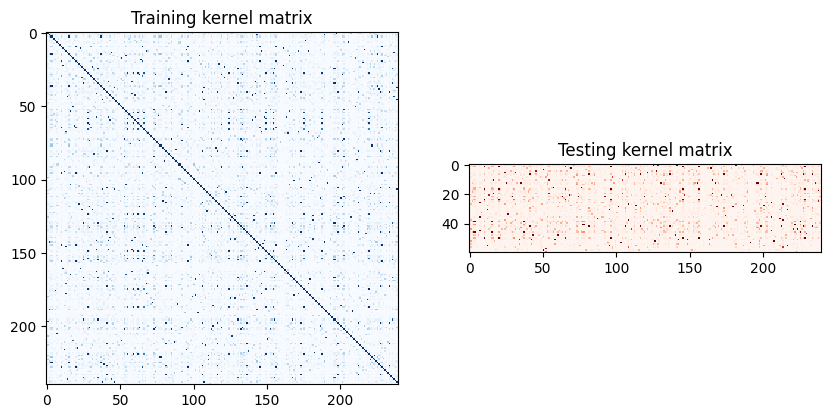

In [ ]:
matrix_train = kernel.evaluate(x_vec=x_train)
matrix_test = kernel.evaluate(x_vec=x_test, y_vec=x_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Testing kernel matrix")

plt.show()

In [ ]:
print(feature_map.decompose())

      ┌───┐┌─────────────┐                                                »
 q_0: ┤ H ├┤ P(2.0*x[0]) ├───■────────────────────────────────────■───────»
      ├───┤├─────────────┤ ┌─┴─┐┌──────────────────────────────┐┌─┴─┐     »
 q_1: ┤ H ├┤ P(2.0*x[1]) ├─┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──■──»
      ├───┤├─────────────┤ └───┘└──────────────────────────────┘└───┘┌─┴─┐»
 q_2: ┤ H ├┤ P(2.0*x[2]) ├───────────────────────────────────────────┤ X ├»
      ├───┤├─────────────┤                                           └───┘»
 q_3: ┤ H ├┤ P(2.0*x[3]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_4: ┤ H ├┤ P(2.0*x[4]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_5: ┤ H ├┤ P(2.0*x[5]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_6: ┤ H ├┤

In [ ]:
confusion2 = confusion_matrix(y_test, predict_clf_cuantico)
confusion2

array([[26,  6],
       [10, 18]])

# MODELO CÚANTICO MALO

In [ ]:
#!pip install qiskit
#!pip install qiskit_machine_learning
#!pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512612 sha256=ae4d1760483181799e55e639074915c3932ff6a5e52788b699487813576426a6
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448da

In [ ]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import ( Module,Conv2d,Linear,Dropout2d,NLLLoss,MaxPool2d, Flatten,Sequential,ReLU)
import torch.nn.functional as F
from qiskit_machine_learning.connectors import TorchConnector

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNNfrom qiskit_machine_learning.circuit.library import QNNCircuit

In [ ]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
algorithm_globals.random_seed = 42

In [ ]:
inputs2 = ParameterVector("input", 4)
weights2 = ParameterVector("weight", 2)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.rx(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.rz(inputs2[2], 0)
qc2.rz(inputs2[3], 1)
qc2.cx(0, 1) #CNOT
qc2.rx(weights2[0], 0)
qc2.rx(weights2[1], 1)


qc2.draw()

input parameters: ['input[0]', 'input[1]', 'input[2]', 'input[3]']
weight parameters: ['weight[0]', 'weight[1]']


┌──────────────┐┌──────────────┐     ┌───────────────┐
q_0: ┤ Rx(input[0]) ├┤ Rz(input[2]) ├──■──┤ Rx(weight[0]) ├
     ├──────────────┤├──────────────┤┌─┴─┐├───────────────┤
q_1: ┤ Ry(input[1]) ├┤ Rz(input[3]) ├┤ X ├┤ Rx(weight[1]) ├
     └──────────────┘└──────────────┘└───┘└───────────────┘

In [ ]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc2.num_qubits, 1)])
observable2 = SparsePauliOp.from_list([("Z" * qc2.num_qubits, 1)])
# el 1 es el peso que se aplica
observables = [observable1, observable2]

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc2, observables=observables, input_params=inputs2, weight_params=weights2
)
estimator_qnn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap

# Define and create QNN
def create_qnn():
     feature_map = ZZFeatureMap(2)
     ansatz = RealAmplitudes(2, reps=1)
     qc = QuantumCircuit(2)
     qc.compose(feature_map, inplace=True)
     qc.compose(ansatz, inplace=True)

     # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
     qnn = EstimatorQNN(
         circuit=qc,
         input_params=feature_map.parameters,
         weight_params=ansatz.parameters,
         input_gradients=True,
     )
     return qnn

qnn4 = create_qnn()

In [ ]:
input_dim  = 14
output_dim = 2

In [ ]:
class Net(nn.Module):
    def __init__(self, estimator_qnn):
        super().__init__()
        self.input_layer    = nn.Linear(input_dim,15)
        self.hidden_layer1  = nn.Linear(15,2)
        self.hidden_layer2  = nn.Linear(2,15)
        self.qnn_layer = TorchConnector(estimator_qnn)  # Apply torch connector
        self.output_layer   = nn.Linear(1,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        out = self.qnn_layer(out)  # apply QNN
        out =  self.output_layer(out)
        return out

model4 = Net(estimator_qnn)

In [ ]:
from torch.utils.data import Dataset, DataLoader
batch_size = 1

# Definir un conjunto de datos train
class MiDataset(Dataset):
    def __init__(self):
        self.datos = x_train
        self.etiquetas = y_train

    def __len__(self):
        return len(self.datos)

    def __getitem__(self, idx):
        return self.datos[idx], self.etiquetas[idx]

# Crear una instancia del conjunto de datos y un DataLoader
mi_dataset = MiDataset()
train_loader = DataLoader(mi_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mi_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# creating our optimizer and loss function object
learning_rate = 0.001
optimizer = torch.optim.Adam(model4.parameters(),lr=learning_rate)
loss_func = NLLLoss()

# Start training
epochs = 30  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

KeyError: 112